In [2]:
# !pip install neptune > /dev/null 2>&1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import neptune

In [66]:
def get_full_table(tags, start_end, component_name, negative_tags=None):

    project = neptune.init_project(
        project="pmtest/llm-random",
        mode="read-only",
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyMDY0ZDI5Ni05YWU3LTQyNGYtYmY4My1hZTFkY2EzYmUwMjgifQ=="
    )
    
    # Determine the column name based on start_end
    start_end_dict_name = "relative_lr" if start_end == "start" else "relative_scheduler_fraction"
    arg_val_column = f"args/{start_end_dict_name}/{component_name}"
    
    # Define the columns of interest
    columns = ["loss", arg_val_column]
    
    # Handle tags for baseline and specific conditions
    baseline_tags = tags + ["baseline"]
    specific_tags = tags + [component_name]
    
    # Fetch tables
    table_baseline = project.fetch_runs_table(tag=baseline_tags).to_pandas()
    table_baseline = table_baseline[columns]
    table_specific = project.fetch_runs_table(tag=specific_tags).to_pandas()
    table_specific = table_specific[columns]
        
    return table_specific, table_baseline

In [67]:
start_end = "end"
component_name = "embedding_layer"
tags = ["relative_lr", "medium", "local_minimum"]
table_specific, table_baseline = get_full_table(tags=tags, start_end=start_end, component_name=component_name)

print(table_baseline)
print()
print(table_specific)


https://app.neptune.ai/pmtest/llm-random/
       loss  args/relative_scheduler_fraction/embedding_layer
0  3.663328                                             0.666

        loss  args/relative_scheduler_fraction/embedding_layer
0   3.719160                                             0.666
1   3.771344                                             0.666
2   3.661967                                             0.666
3   3.697625                                             0.666
4   3.744873                                             0.666
5   3.726094                                             0.666
6   3.751850                                             0.666
7   3.660367                                             0.666
8   3.773646                                             0.666
9   3.796943                                             0.666
11  3.663168                                             0.666
12  3.720199                                             0.666
13  3.677051  

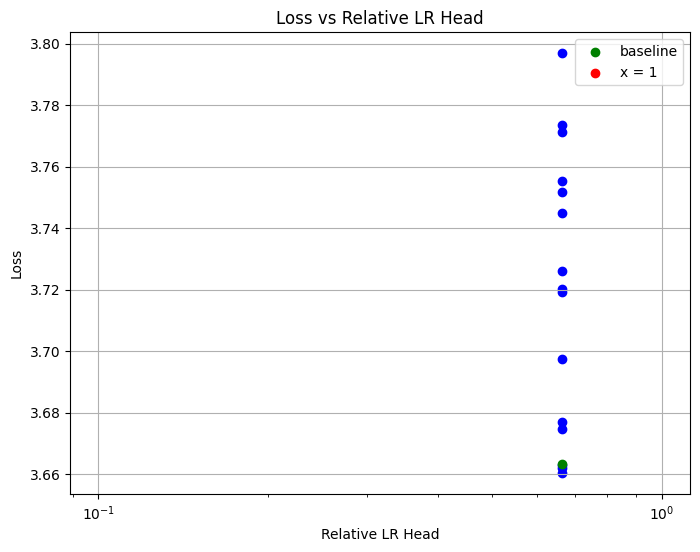

In [68]:
import matplotlib.pyplot as plt

# Plotting with just points (scatter plot)
plt.figure(figsize=(8, 6))

# Plot all points in default color
plt.scatter(table_specific.iloc[:, 1], table_specific['loss'], color='blue')
plt.scatter(table_baseline.iloc[:, 1], table_baseline['loss'], color='green', label='baseline')

# Highlight the point where x = 1 in red
plt.scatter(table_specific[table_specific.iloc[:, 1] == 1].iloc[:, 1], table_specific[table_specific.iloc[:, 1] == 1]['loss'], color='red', label='x = 1')

# Set x-axis to log scale
plt.xscale('log')
plt.xlabel('Relative LR Head')
plt.ylabel('Loss')
plt.title('Loss vs Relative LR Head')
plt.grid(True)

# Optional: Add a legend
plt.legend()

plt.show()


In [69]:
def plot_loss_vs_lr_head(ax, table_specific, table_baseline, component, dict_name):
    """
    Plots Loss vs Relative LR Head on the given axis with additional context.

    Parameters:
    - ax: The matplotlib axis object to plot on.
    - table_specific: DataFrame containing 'loss' and 'Relative LR Head' for specific data.
    - table_baseline: DataFrame containing 'loss' and 'Relative LR Head' for baseline data.
    - component: The component name to be used in the title or labels.
    - dict_name: The dict name to be used in the title or labels.

    Returns:
    - The matplotlib axis object with the plot.
    """
    # Plot all points in default color
    ax.scatter(table_specific.iloc[:, 1], table_specific['loss'], color='blue', label='specific')
    ax.scatter(table_baseline.iloc[:, 1], table_baseline['loss'], color='green', label='baseline')

    # Highlight the point where x = 1 in red
    ax.scatter(
        table_specific[table_specific.iloc[:, 1] == 1].iloc[:, 1],
        table_specific[table_specific.iloc[:, 1] == 1]['loss'],
        color='red', label='x = 1'
    )

    # Set x-axis to log scale
    ax.set_xscale('log')
    ax.set_xlabel('Relative LR Head')
    ax.set_ylabel('Loss')
    ax.set_title(f'{component} - {dict_name}')
    ax.grid(True)
    ax.legend()

    return ax

https://app.neptune.ai/pmtest/llm-random/
https://app.neptune.ai/pmtest/llm-random/
https://app.neptune.ai/pmtest/llm-random/
https://app.neptune.ai/pmtest/llm-random/
https://app.neptune.ai/pmtest/llm-random/
https://app.neptune.ai/pmtest/llm-random/
https://app.neptune.ai/pmtest/llm-random/
https://app.neptune.ai/pmtest/llm-random/
https://app.neptune.ai/pmtest/llm-random/
https://app.neptune.ai/pmtest/llm-random/


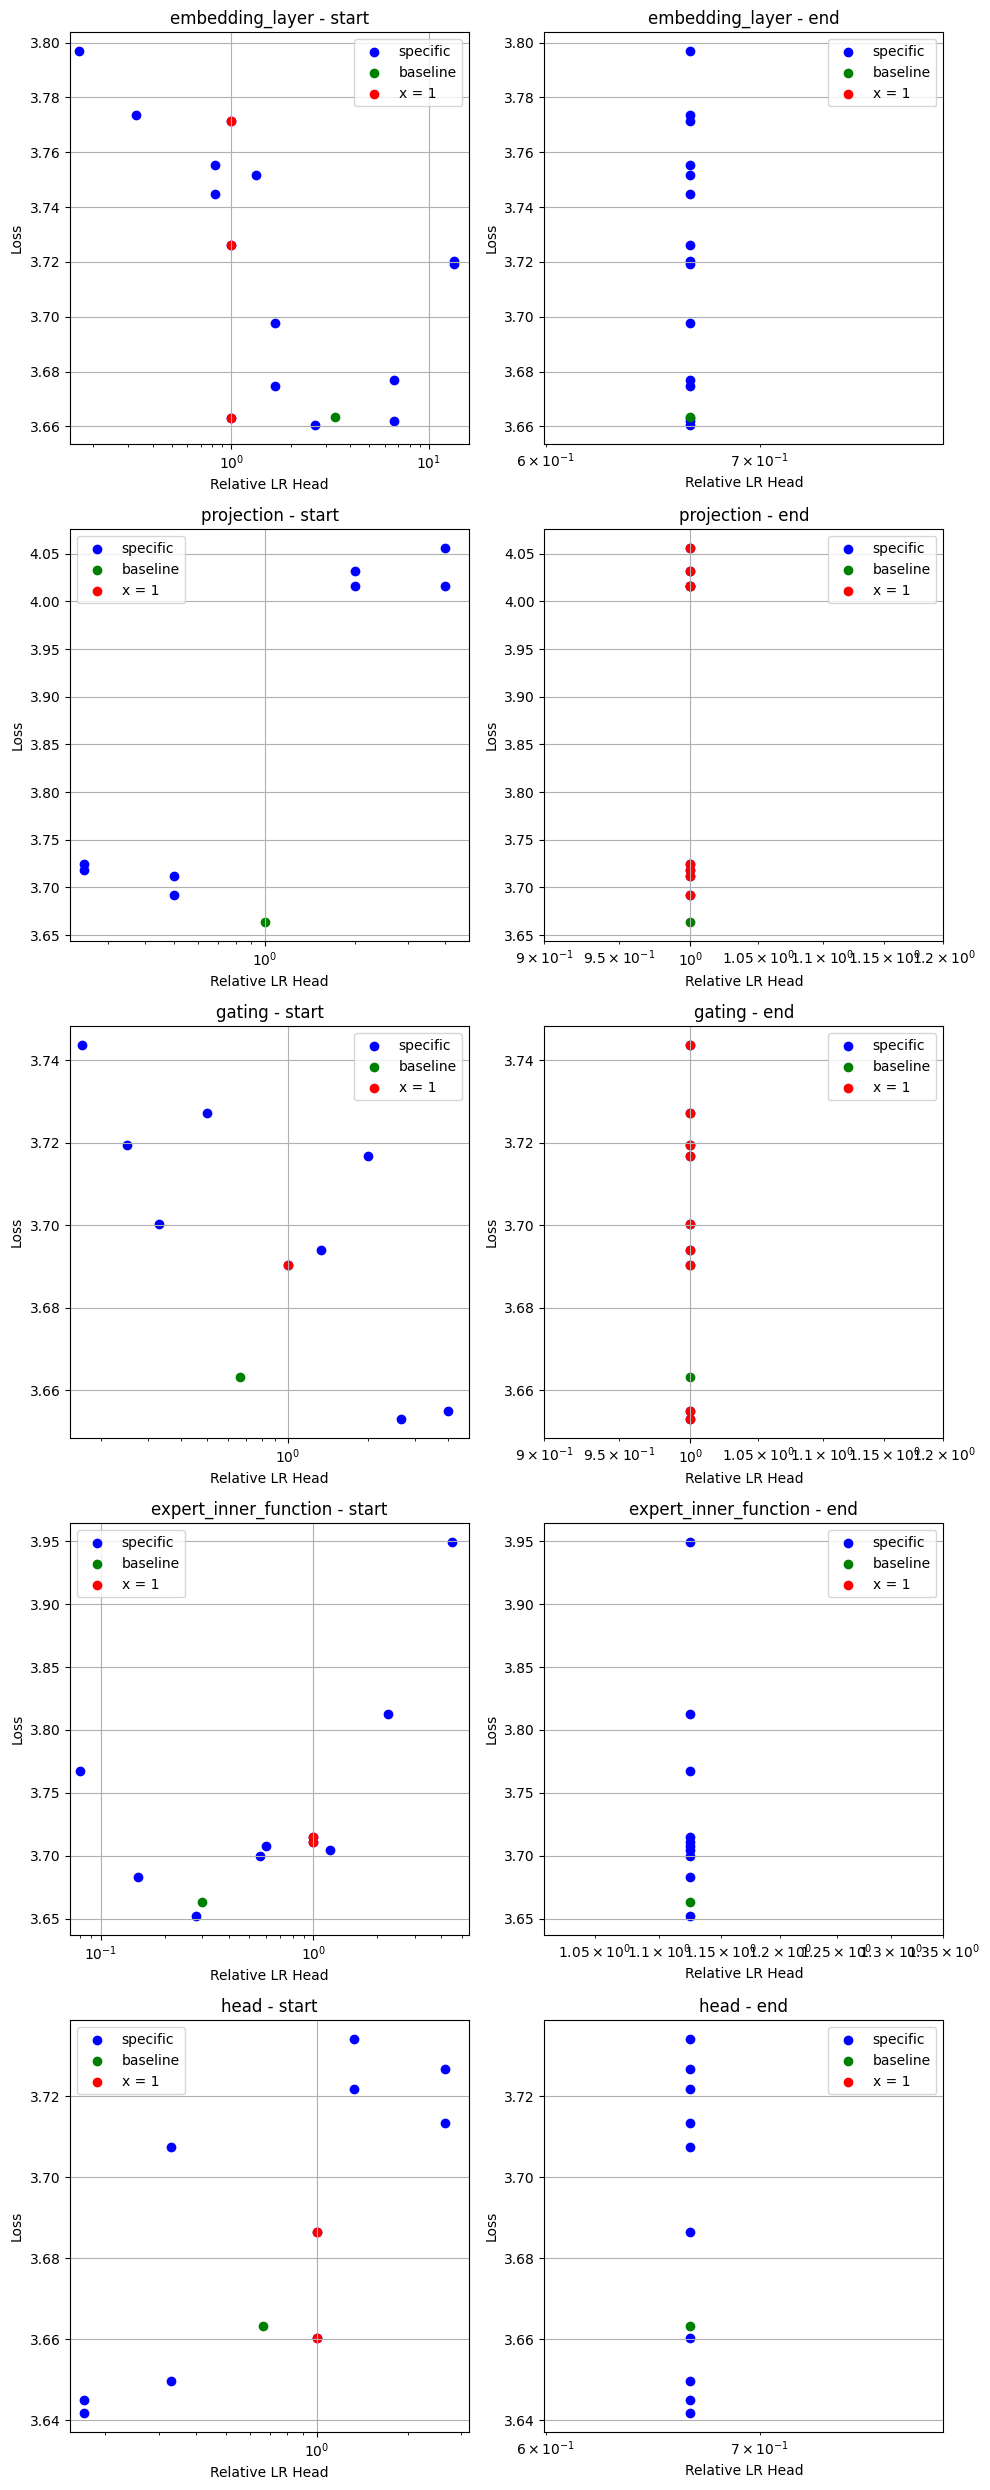

In [70]:
model_size = "medium"

# Define component names and dict names
component_names = ["embedding_layer", "projection", "gating", "expert_inner_function", "head"]
dict_names = ["start", "end"]
tags = ["relative_lr", f"{model_size}", "local_minimum"]

# Create subplots
fig, axs = plt.subplots(len(component_names), len(dict_names), figsize=(10, 25))

# Plotting
for i, dict_name in enumerate(dict_names):
    for j, component in enumerate(component_names):
        table_specific, table_baseline = get_full_table(tags=tags, start_end=dict_name, component_name=component)
        ax = axs[j, i]
        # Call the plotting function
        plot_loss_vs_lr_head(ax, table_specific, table_baseline, component, dict_name)

        x_min = table_specific.iloc[:, 1].min()

        x_max = table_specific.iloc[:, 1].max()
        
        # Set x-axis limits
        ax.set_xlim([x_min * 0.9, x_max * 1.2])

        # x_values = np.unique(np.concatenate([
        #     table_specific.iloc[:, 1].values,
        #     table_baseline.iloc[:, 1].values
        # ]))
        # ax.set_xticks(x_values)

# Adjust layout
plt.tight_layout()
plt.savefig(f'{model_size}_U-plots.png', dpi=300)
plt.show()